[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/googlecolab/colabtools/blob/master/notebooks/colab-github-demo.ipynb)

In [ ]:
#display all the outputs
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

## Regression Discontinuity Design (RDD)
“Should the legal age for drinking be reduced from 21?”

Keeping 21 as the threshold for age, compare the average to one side of the threshold minus average to the other side to determine if alcohol increases the chances of death by accident, suicide and/or others.

In [ ]:
import pandas as pd
import numpy as np
drinking = pd.read_csv("drinking.csv")
drinking.shape
drinking.head()

(50, 4)

,age,others,accident,suicide
0,19.068493,92.825401,35.829327,11.203714
1,19.150684,95.100739,35.639256,12.193368
2,19.232876,92.144295,34.205650,11.715812
3,19.315069,88.427757,32.278957,11.275010
4,19.397261,88.704941,32.650967,10.984314


 choosing the bandwidth to be 1 year (i.e., 21 +- 1).

In [ ]:
Under_21 = drinking[(drinking['age'] >= 20) & (drinking['age'] < 21)]
Above_21 = drinking[(drinking['age'] >= 21) & (drinking['age'] < 22)]

In [ ]:
Under_21.shape
Above_21.shape

(13, 4)

(13, 4)

In [ ]:
Under_21.mean()

age         20.544783
others      93.318850
accident    31.296563
suicide     11.642920
dtype: float64

In [ ]:
Above_21.mean()

age         21.455216
others      99.860510
accident    32.635049
suicide     13.361998
dtype: float64

In [ ]:
treat_effect = Above_21.mean()-Under_21.mean()
treat_effect

age         0.910433
others      6.541660
accident    1.338486
suicide     1.719078
dtype: float64

There is difference in the chance of death by accident, suicide and others for people above and below the threshold. But we don't know if this difference is statistically significant.

Graphs to show the discontinuity and to results for the change in chances of death with all the three features (i.e., accident vs age, suicide vs age and others vs age).

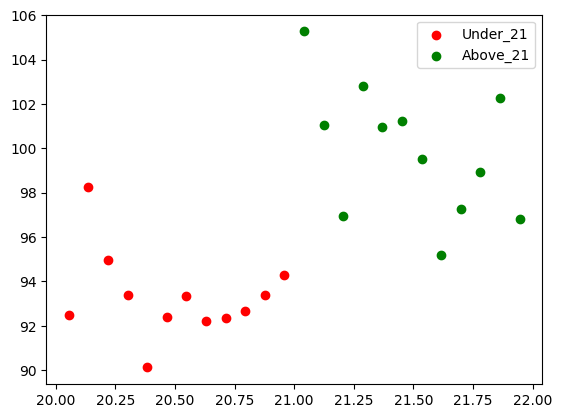

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(Under_21['age'], Under_21['others'], color='r', label='Under_21')
plt.scatter(Above_21['age'], Above_21['others'], color='g', label='Above_21') 
plt.legend()
plt.show()

In [ ]:
#### Performing 2-Sample t-test on Others Death rate to check whether the difference is statistically significant.
import scipy.stats as stats
stats.ttest_ind(a=Under_21[['others']].dropna(axis=0).to_numpy(), b=Above_21[['others']].dropna(axis=0).to_numpy(), equal_var=True)

Ttest_indResult(statistic=array([-6.4050666]), pvalue=array([1.91334081e-06]))

From the plot of others v/s age we can see there is difference in the death due to others for childern above and below the threshold. The difference is statistically significant.

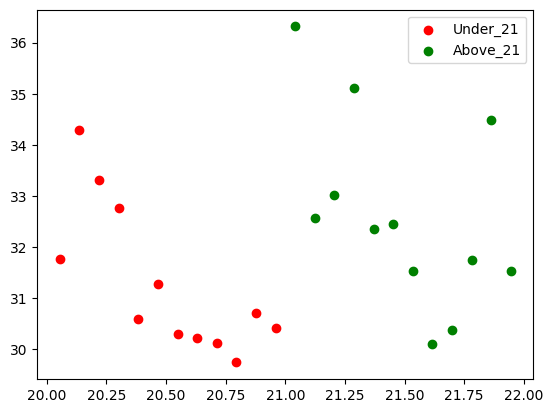

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(Under_21['age'], Under_21['accident'], color='r', label='Under_21')
plt.scatter(Above_21['age'], Above_21['accident'], color='g', label='Above_21') 
plt.legend()
plt.show()

In [ ]:
import scipy.stats as stats
stats.ttest_ind(a=Under_21[['accident']].dropna(axis=0).to_numpy(), b=Above_21[['accident']].dropna(axis=0).to_numpy(), equal_var=True)

Ttest_indResult(statistic=array([-1.96849131]), pvalue=array([0.06173871]))

From the plot of accident v/s age we can see there is difference in the death due to accident for childern above and below the threshold. The difference is statistically significant at 90% significance level.

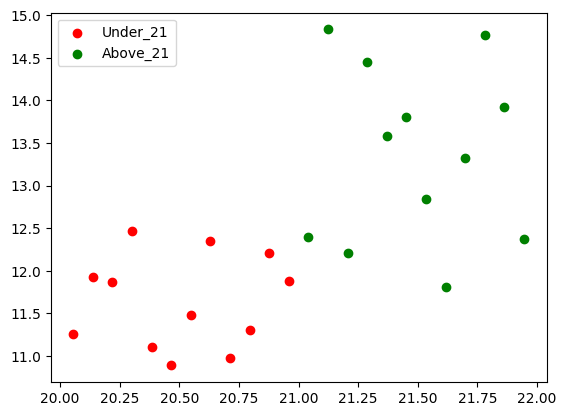

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(Under_21['age'], Under_21['suicide'], color='r', label='Under_21')
plt.scatter(Above_21['age'], Above_21['suicide'], color='g', label='Above_21') 
plt.legend()
plt.show()

In [ ]:
import scipy.stats as stats
stats.ttest_ind(a=Under_21[['suicide']].dropna(axis=0).to_numpy(), b=Above_21[['suicide']].dropna(axis=0).to_numpy(), equal_var=True)

Ttest_indResult(statistic=array([-5.09113481]), pvalue=array([4.22627915e-05]))

From the plot of suicide v/s age we can see there is difference in the death due to suicide for childern above and below the threshold. The difference is statistically significant.

We can say that there is some correlation between the deaths above and below the threshold of legal age of drinking. But we cannot draw a causal inference here that the deaths are because of the legal age of drinking being 21. There could be a lot other confounding factors and could not be directly related to alcohol. If at all alcohol is the reason behind it, decreasing the legal age would be even worst decision as the same difference would then be observed between  the age 19-20 and 20-21. We need to first control for the confounding factors, identify the through treatment effect and only then draw inferences.

### Effect of choosing a smaller bandwidth?
By choosing a smaller bandwidth, we should observe a larger difference in the group above and below the threshold. This is because by comparing observations lying closely on either side of the threshold, we estimate the marginal treatment effect. The value closer to the threshold are mostly similar in other factors except for the treatment. So if the  smaller bandwidth is choosen we would observe higher treatment effect.

In [ ]:
### Reducing the bandwidth to +- 0.5 years
Under_21_new = drinking[(drinking['age'] >= 20.5) & (drinking['age'] < 21)]
Above_21_new = drinking[(drinking['age'] >= 21) & (drinking['age'] < 21.5)]
Above_21_new.mean()-Under_21_new.mean()

age         0.422702
others      8.350254
accident    3.384067
suicide     1.848369
dtype: float64

We can see that after reducing the bandwidth, the difference between chance of death due to others, accident and suicide has infact increased for above aand below the threshold

### Effect of choosing the maximum bandwidth?
On contrary if the bandwidth is maximum, we would be calculating the average treatment effect. The differnce is likely to be smaller than the difference when a smaller bandwidth is chosen. But no inferences could be made basis that as for the people farther from the threshold would vary largely across other factors and making a comparison basis that would not be right. In reality the the  interest lies in the population close to the threshold and inferences on them are of value. Choosing the maximum bandwith will not yeild any significant insights. 

In [ ]:
### Increasing the bandwidth to maximum
Under_21_new = drinking[(drinking['age'] < 21)]
Above_21_new = drinking[(drinking['age'] >= 21)]
Above_21_new.mean()-Under_21_new.mean()

age         1.893699
others      5.740044
accident   -1.677356
suicide     1.436442
dtype: float64

We can see that after increasing the bandwidth to maximum, the differnce between chance of death due to others, and suicide has decreased. For the accidents we are getting a negative value meaning youngsters have higher chances of death than elderly due to accidents.